In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2

In [2]:
dataset = pd.read_csv('dataframe.csv', header = 0)

dataset.rename(columns = {'Density, ppg' : 'Density'}, inplace = True)
dataset.drop(columns = ['Test No.', 'PV'], inplace = True)
dataset.head()

,Density,YP,Temperature,ROP,Pipe rotation,Flow rate,Inclination,Eccentricity,Concentration
0,8.314,20,80,30,0,100,90,0.881,0.35
1,8.314,20,80,30,0,200,90,0.881,0.14
2,8.314,20,80,30,80,100,90,0.881,0.06
3,8.314,20,80,30,80,200,90,0.881,0.02
4,8.314,20,180,30,0,100,90,0.881,0.11


In [3]:
dataset.describe()

,Density,YP,Temperature,ROP,Pipe rotation,Flow rate,Inclination,Eccentricity,Concentration
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,9.333310,22.931034,136.034483,31.293103,33.103448,143.103448,83.258621,0.769621,0.113621
std,1.653067,12.718849,44.308784,6.597783,39.571922,45.989863,10.514686,0.160266,0.108719
min,8.314000,0.000000,80.000000,15.000000,0.000000,75.000000,67.000000,0.541000,0.000000
25%,8.314000,20.000000,80.000000,30.000000,0.000000,100.000000,67.000000,0.541000,0.017500
50%,8.314000,20.000000,120.000000,30.000000,0.000000,150.000000,90.000000,0.881000,0.075000
75%,12.000000,40.000000,180.000000,40.000000,80.000000,200.000000,90.000000,0.881000,0.190000
max,12.000000,40.000000,180.000000,40.000000,80.000000,250.000000,90.000000,0.881000,0.410000


In [4]:
dataset.to_csv('cleaned_data.csv')

## Plotting the Correlation Matrix

In [5]:
df = pd.read_csv('dataframe.csv', header = 0)
df.rename(columns = {'Density, ppg' : 'Density'}, inplace = True)
df.drop(columns = ['Test No.'], inplace = True)

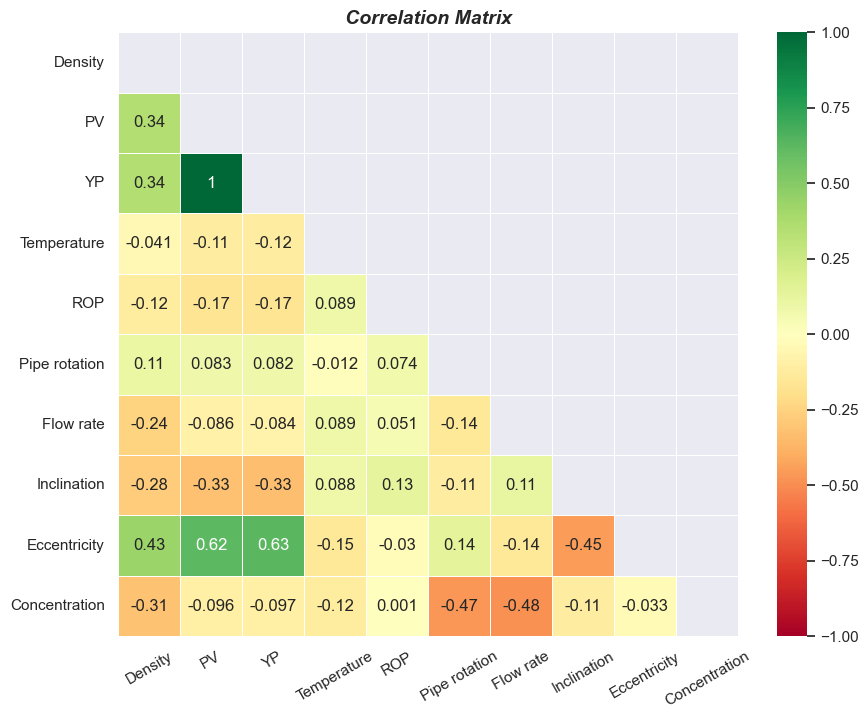

In [6]:
corr = df.corr().round(3)

plt.figure(figsize = (10, 8), dpi = 100)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.set_theme(style = 'darkgrid')
sns.heatmap(corr, annot= True, center = 0, mask = mask, linewidths  = .5, cmap = 'RdYlGn', vmin = -1, vmax = 1)
plt.xticks(rotation = 30)
plt.title('Correlation Matrix', fontdict = {'fontsize': 14, 'style':'oblique', 'weight': 'bold'})
plt.savefig(fname = 'correlation_matrix.png', format = 'png');

## Feature Ranking

In [7]:
corr_coef = np.abs(corr.iloc[-1, :-1]).sort_values(ascending=False)
corr_coef

Flow rate        0.485
Pipe rotation    0.474
Density          0.314
Temperature      0.123
Inclination      0.110
YP               0.097
PV               0.096
Eccentricity     0.033
ROP              0.001
Name: Concentration, dtype: float64

In [8]:
forest_clf = RandomForestRegressor(criterion = 'squared_error')
forest_clf.fit(df.drop(columns = 'Concentration'), df['Concentration'])
gini_importance = pd.Series(index=df.columns[:-1], data = forest_clf.feature_importances_).sort_values(ascending = False)
gini_importance

Flow rate        0.337880
Pipe rotation    0.273177
Density          0.153824
Inclination      0.078536
Temperature      0.057394
ROP              0.036025
YP               0.023389
PV               0.022279
Eccentricity     0.017496
dtype: float64

In [9]:
feature_importance = pd.DataFrame({'Pearson':corr_coef.index, 'Gini': gini_importance.index})
feature_importance

,Pearson,Gini
0,Flow rate,Flow rate
1,Pipe rotation,Pipe rotation
2,Density,Density
3,Temperature,Inclination
4,Inclination,Temperature
5,YP,ROP
6,PV,YP
7,Eccentricity,PV
8,ROP,Eccentricity
